In [1]:
import cometspy_virus_test as c
import cobra
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data1 = pd.read_csv('DynamicSimulation|static|r=0.1|vmin=1.csv')
data3 = pd.read_csv('DynamicSimulation|static|r=0.3|vmin=1.csv')
data5 = pd.read_csv('DynamicSimulation|static|r=0.5|vmin=1.csv')

In [3]:
plt.rcParams['font.size'] = 20

def add_subplot_axes(ax,rect,facecolor='w'): # matplotlib 2.0+
    fig = plt.gcf()
    box = ax.get_position()
    width = box.width
    height = box.height
    inax_position  = ax.transAxes.transform(rect[0:2])
    transFigure = fig.transFigure.inverted()
    infig_position = transFigure.transform(inax_position)    
    x = infig_position[0]
    y = infig_position[1]
    width *= rect[2]
    height *= rect[3]  # <= Typo was here
    #subax = fig.add_axes([x,y,width,height],facecolor=facecolor)  # matplotlib 2.0+
    subax = fig.add_axes([x,y,width,height])
    x_labelsize = subax.get_xticklabels()[0].get_size()
    y_labelsize = subax.get_yticklabels()[0].get_size()
    x_labelsize *= rect[2]**0.5
    y_labelsize *= rect[3]**0.5
    subax.xaxis.set_tick_params(labelsize=x_labelsize)
    subax.yaxis.set_tick_params(labelsize=y_labelsize)
    return subax

<ipython-input-4-11fe244c0515>:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


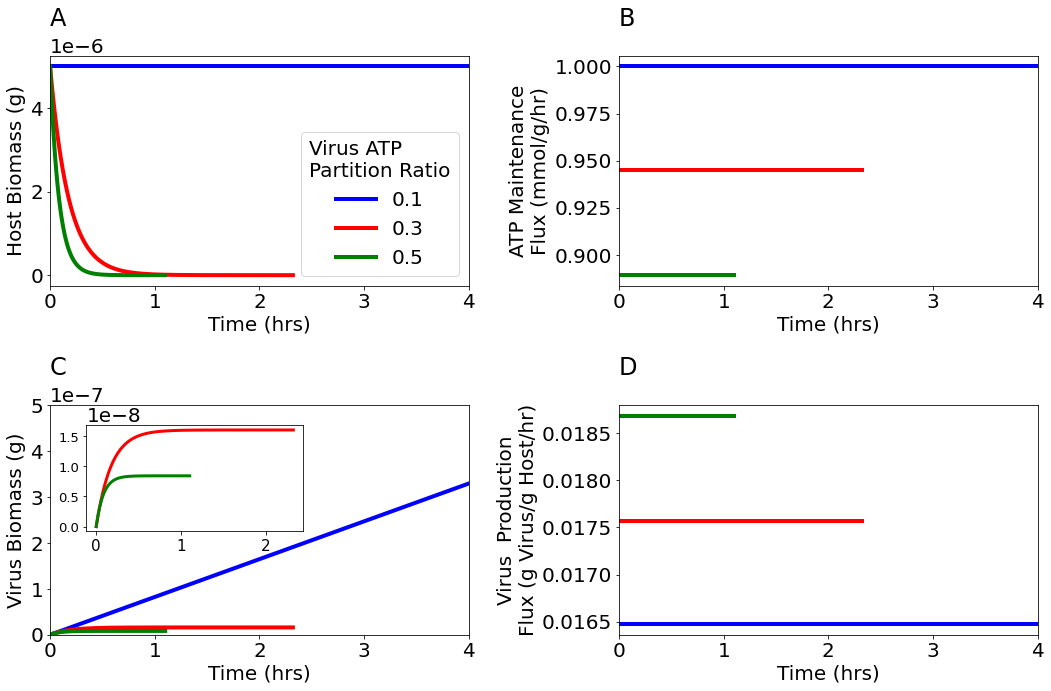

In [4]:
zoom = 4

fig, axs = plt.subplots(ncols= 2, nrows= 2, figsize= (15, 10))

#------------------------------------------#



line1 = sns.lineplot(data= data1, 
             x= 'cycle', y= 'host biomass', ax= axs[0][0], linewidth= 4, color= 'blue')
line2 = sns.lineplot(data= data3, 
             x= 'cycle', y= 'host biomass', ax= axs[0][0], linewidth= 4, color= 'red')
line3 = sns.lineplot(data= data5, 
             x= 'cycle', y= 'host biomass', ax= axs[0][0], linewidth= 4, color= 'green')
axs[0][0].set_xlabel('Time (hrs)')
axs[0][0].set_ylabel('Host Biomass (g)')
axs[0][0].set_xlim(0, zoom)

axs[0][0].legend(['0.1', '0.3', '0.5'], title= 'Virus ATP\nPartition Ratio')
axs[0][0].set_title('A', pad= 30, loc= 'left')

#------------------------------------------#

sns.lineplot(data= data1, 
             x= 'cycle', y= 'virus mass', ax= axs[1][0], linewidth= 4, color= 'blue')
sns.lineplot(data= data3, 
             x= 'cycle', y= 'virus mass', ax= axs[1][0], linewidth= 4, color= 'red')
sns.lineplot(data= data5, 
             x= 'cycle', y= 'virus mass', ax= axs[1][0], linewidth= 4, color= 'green')
axs[1][0].set_xlabel('Time (hrs)')
axs[1][0].set_ylabel('Virus Biomass (g)')
axs[1][0].set_xlim(0, zoom)
axs[1][0].set_ylim(0, 5e-7)

axs[1][0].set_title('C', pad= 30, loc= 'left')


#------------------------------------------#

sns.lineplot(data= data1, 
             x= 'cycle', y= 'ATPM', ax= axs[0][1], linewidth= 4, color= 'blue')
sns.lineplot(data= data3, 
             x= 'cycle', y= 'ATPM', ax= axs[0][1], linewidth= 4, color= 'red')
sns.lineplot(data= data5, 
             x= 'cycle', y= 'ATPM', ax= axs[0][1], linewidth= 4, color= 'green')
axs[0][1].set_xlabel('Time (hrs)')
axs[0][1].set_ylabel('ATP Maintenance\nFlux (mmol/g/hr)')
axs[0][1].set_xlim(0, zoom)

axs[0][1].set_title('B', pad= 30, loc= 'left')

#------------------------------------------#

sns.lineplot(data= data1, 
             x= 'cycle', y= 'VBOF', ax= axs[1][1], linewidth= 4, color= 'blue')
sns.lineplot(data= data3, 
             x= 'cycle', y= 'VBOF', ax= axs[1][1], linewidth= 4, color= 'red')
sns.lineplot(data= data5, 
             x= 'cycle', y= 'VBOF', ax= axs[1][1], linewidth= 4, color= 'green')
axs[1][1].set_xlabel('Time (hrs)')
axs[1][1].set_ylabel('Virus  Production\nFlux (g Virus/g Host/hr)')
axs[1][1].set_xlim(0, zoom)

axs[1][1].set_title('D', pad= 30, loc= 'left')

#------------------------------------------#

rect = [-0.09,0.34,0.57,0.43]
ax2 = add_subplot_axes(axs[1][0],rect)
sns.lineplot(data= data3, 
             x= 'cycle', y= 'virus mass', ax= ax2, linewidth= 3, color= 'red')
sns.lineplot(data= data5, 
             x= 'cycle', y= 'virus mass', ax= ax2, linewidth= 3, color= 'green')
ax2.set_xlabel('')
ax2.set_ylabel('')

plt.tight_layout()



In [ ]:
fig.savefig('filename.jpg', format='jpg')